**Problem Statement**

We will help cardekho.com for predict specific price in type of car. We use dataset from [here](www.cardekho.com) that have some given information: Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission -Owner.

In [2]:
# Import useful library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Ingest dataset
!unzip "cardata.zip"

Archive:  cardata.zip
 extracting: car%20data.csv          


In [42]:
df = pd.read_csv("car%20data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## **DATA EXPLORATION**

In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (301, 9)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# numerical stats
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# checking null
df.isnull().sum()/df.shape[0]

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [11]:
# preprocessing dataset
df['Age'] = 2021 - df['Year']
df.drop(['Year'], axis=1, inplace=True)

In [44]:
df.rename(columns={'Selling_Price':'Selling_Price(lacs)',
                   'Present_Price':'Present_Price(lacs)',
                   'Owner':'Past_Owners'},
          inplace = True)

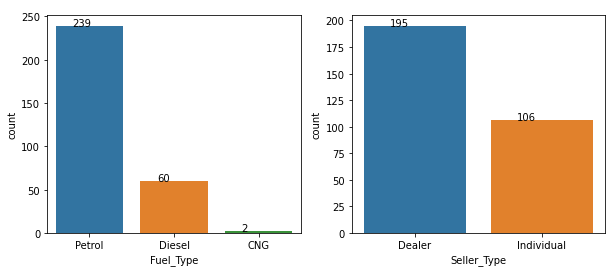

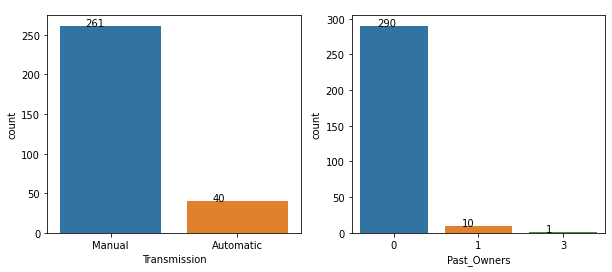

In [38]:
# CATEGORICAL
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']
i = 0
while i < 4:
  fig = plt.figure(figsize=[10,4])
  plt.subplot(1, 2, 1)
  ax = sns.countplot(data=df, x=cat_cols[i])
  for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, 
                                        p.get_height()), 
                color='black', size=10) 
  i += 1
  
  plt.subplot(1,2,2)
  ax = sns.countplot(data=df, x=cat_cols[i])
  for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, 
                                        p.get_height()), 
                color='black', size=10) 
  i += 1
  plt.show()

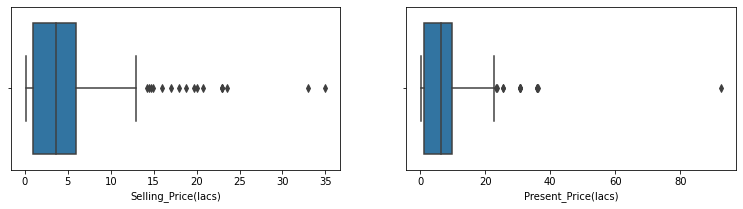

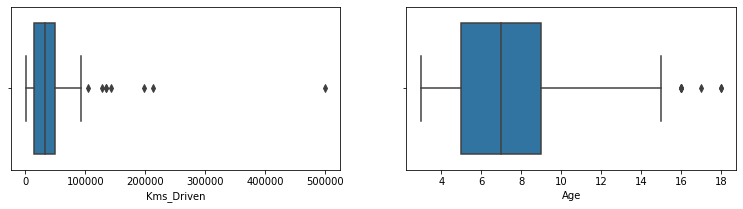

In [40]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
  
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

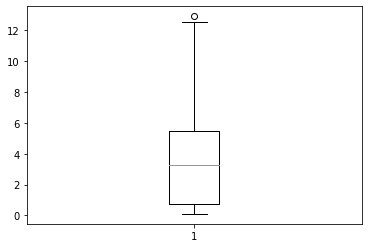

In [45]:
# Handling outlier
Q1 = df["Selling_Price(lacs)"].quantile(0.25)
Q3 = df["Selling_Price(lacs)"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["Selling_Price(lacs)"] >= Q1 - 1.5*IQR) & (df["Selling_Price(lacs)"] <= Q3 + 1.5*IQR)]
plt.boxplot(df["Selling_Price(lacs)"]);

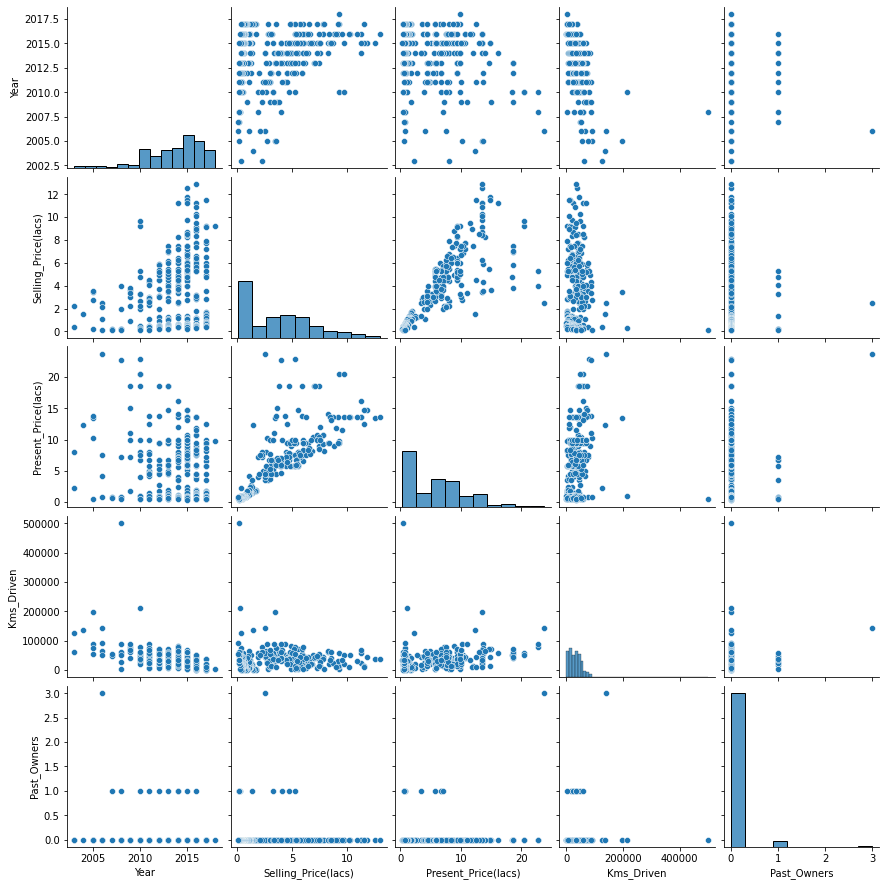

In [46]:
# Bivariate Analysis
sns.pairplot(df)
plt.show()

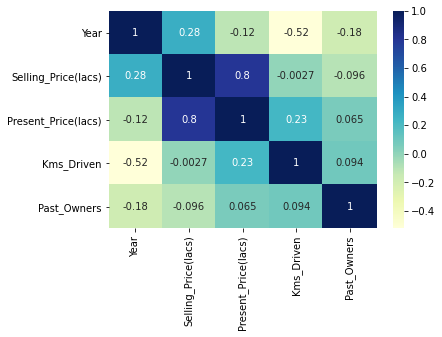

In [48]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [50]:
# Correlation selling price
df.corr()['Selling_Price(lacs)']

Year                   0.279578
Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.801950
Kms_Driven            -0.002729
Past_Owners           -0.095591
Name: Selling_Price(lacs), dtype: float64

In [51]:
df.pivot_table(values='Selling_Price(lacs)', 
               index = 'Seller_Type', 
               columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,6.92587,4.983359
Individual,NaN,NaN,0.726857


In [52]:
df.pivot_table(values='Selling_Price(lacs)', 
               index = 'Seller_Type', 
               columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,6.059412,5.398765
Individual,0.565000,0.743895


**Conclusion**
1. Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
2. Car age is effecting negatively as older the car lesser the Selling Price.
3. Car of Manual type is of less priced whereas of Automatic type is high.
4. Cars sold by Individual tend to get less Selling Price when sold by Dealers.
5. Selling Price of cars with Fuel type Diesel is higher.


## **Modelling STEP**

In [54]:
# Handling categorical
data = df.drop(['Car_Name'], axis=1)
data = pd.get_dummies(data=df, drop_first=True)
data.head()

,Year,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,Car_Name_Bajaj Avenger Street 220,Car_Name_Bajaj Discover 100,Car_Name_Bajaj Discover 125,Car_Name_Bajaj Dominar 400,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar 135 LS,Car_Name_Bajaj Pulsar 150,Car_Name_Bajaj Pulsar 220 F,Car_Name_Bajaj Pulsar NS 200,Car_Name_Bajaj Pulsar RS200,Car_Name_Hero CBZ Xtreme,Car_Name_Hero Ignitor Disc,Car_Name_Hero Extreme,Car_Name_Hero Glamour,Car_Name_Hero Honda CBZ extreme,Car_Name_Hero Honda Passion Pro,Car_Name_Hero Hunk,Car_Name_Hero Passion Pro,Car_Name_Hero Passion X pro,Car_Name_Hero Splender Plus,Car_Name_Hero Splender iSmart,Car_Name_Hero Super Splendor,Car_Name_Honda Activa 125,Car_Name_Honda Activa 4G,Car_Name_Honda CB Hornet 160R,Car_Name_Honda CB Shine,Car_Name_Honda CB Trigger,Car_Name_Honda CB Unicorn,...,Car_Name_Yamaha Fazer,Car_Name_alto 800,Car_Name_alto k10,Car_Name_amaze,Car_Name_baleno,Car_Name_brio,Car_Name_camry,Car_Name_ciaz,Car_Name_city,Car_Name_corolla,Car_Name_corolla altis,Car_Name_creta,Car_Name_dzire,Car_Name_elantra,Car_Name_eon,Car_Name_ertiga,Car_Name_etios cross,Car_Name_etios g,Car_Name_etios gd,Car_Name_etios liva,Car_Name_fortuner,Car_Name_grand i10,Car_Name_i10,Car_Name_i20,Car_Name_ignis,Car_Name_innova,Car_Name_jazz,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [56]:
# Splitting data
y = data['Selling_Price(lacs)']
X = data.drop(['Selling_Price(lacs)'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=11)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (227, 104)
x test:  (57, 104)
y train:  (227,)
y test:  (57,)


In [57]:
# Build Eval Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []
mae_train=[]
mse_train=[]
mae_test=[]
mse_test=[]

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # Mean Squared error  of train set
    mse_train_model = mean_squared_error(y_train,y_pred_train)
    mse_train.append(round(mse_train_model,2))
    
    # Mean absolute error of train set
    mae_train_model = mean_absolute_error(y_train,y_pred_train)
    mae_train.append(round(mae_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # Mean Squared error of test set
    mse_test_model = mean_squared_error(y_test,y_pred_test)
    mse_test.append(round(mse_test_model,2))
    
    # Mean absolute error of train set
    mae_test_model = mean_absolute_error(y_test,y_pred_test)
    mae_test.append(round(mae_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))  
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train Mean absolute error :",round(mae_train_model,2))
    print("Test Mean absolute error :",round(mae_test_model,2))
    print("Train Mean Squared error :",round(mse_train_model,2))
    print("Test Mean Squared error :",round(mse_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.96
Test R2-score : 0.35
Train Mean absolute error : 0.41
Test Mean absolute error : 1.46
Train Mean Squared error : 0.39
Test Mean Squared error : 5.66
Train CV scores : [ 0.68105261  0.58850455  0.24197588 -0.09011202  0.79330158]
Train CV mean : 0.44


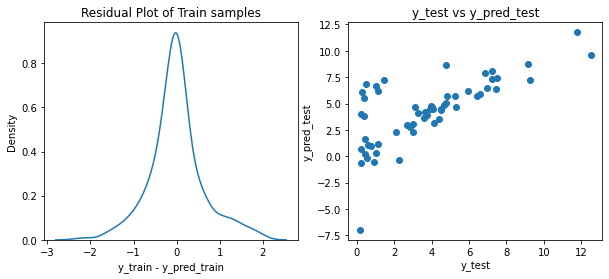

In [58]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.93
Test R2-score : 0.82
Train Mean absolute error : 0.59
Test Mean absolute error : 0.82
Train Mean Squared error : 0.65
Test Mean Squared error : 1.59
Train CV scores : [0.88259524 0.89293218 0.89834653 0.78328335 0.8360698 ]
Train CV mean : 0.86


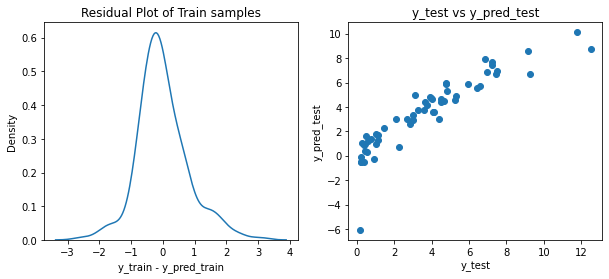

In [59]:
# 2. Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.92
Test R2-score : 0.82
Train Mean absolute error : 0.67
Test Mean absolute error : 0.79
Train Mean Squared error : 0.77
Test Mean Squared error : 1.61
Train CV scores : [0.84710125 0.87030442 0.90849819 0.77364054 0.84832265]
Train CV mean : 0.85


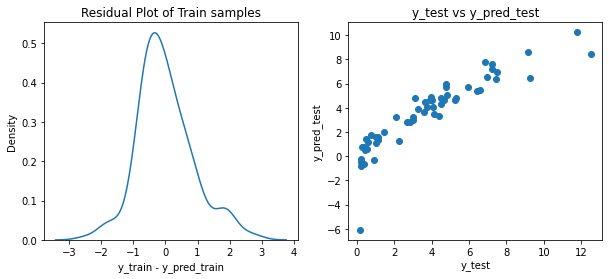

In [60]:
# 3. Lasso Regression
from sklearn.linear_model import Lasso
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

Train R2-score : 0.99
Test R2-score : 0.95
Train Mean absolute error : 0.2
Test Mean absolute error : 0.44
Train Mean Squared error : 0.09
Test Mean Squared error : 0.44
Train CV scores : [0.90910181 0.93119988 0.94180689 0.92736433 0.94745428]
Train CV mean : 0.93


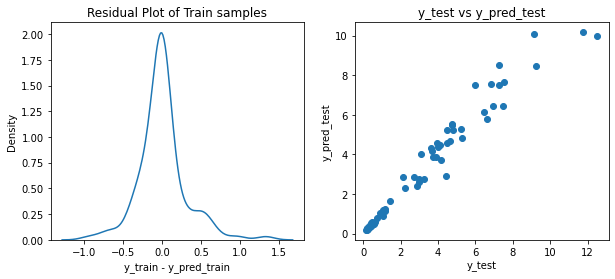

In [61]:
# 4. Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_pred_model(rf_rs,'random_forest.pkl')

In [62]:
# RESULT
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV,
                     "mae_train":mae_train,"mse_train":mse_test,"mae_test":mae_test,"mse_test":mse_test})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train),mae_train,mse_train,mae_test,mse_test
0,LinearRegression,0.96,0.35,0.44,0.41,5.66,1.46,5.66
1,Ridge,0.93,0.82,0.86,0.59,1.59,0.82,1.59
2,Lasso,0.92,0.82,0.85,0.67,1.61,0.79,1.61
3,RandomForestRegressor,0.99,0.95,0.93,0.20,0.44,0.44,0.44
